# <center> Réalisez une étude de santé publique avec R ou Python</center>

# Première partie

<html><div class="oc-richContent c511"><aside data-claire-semantic="information">
</aside>
<h3>Scénario</h3>
<p>Félicitations&nbsp;! Vous avez récemment rejoint une équipe de chercheurs de la <a href="http://www.fao.org/home/fr/">Food and Agriculture Organization of the United Nations (FAO)</a>, en tant que data analyst.</p>
<figure><a href="https://user.oc-static.com/upload/2020/11/23/16061289311922_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2011.06.07.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/23/16061289311922_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2011.06.07.png" alt="Food and Agriculture Organization of the United Nations"></a>
<figcaption>Food and Agriculture Organization of the United Nations</figcaption>
</figure>
<p>Son rôle&nbsp;? C’est l’un des organes qui composent l’ONU et dont l’objectif est «&nbsp;d’aider à construire un monde libéré de la faim&nbsp;».&nbsp;</p>
<p>Le responsable de l’équipe, Marc, un chercheur en économie de la santé, est particulièrement enthousiaste à l’idée de votre arrivée au sein de son équipe. En effet, ce recrutement tombe à pic car Julien, l'ancien data analyst, a récemment été muté dans une autre équipe, et la vôtre vient de se voir confier la mission de réaliser une étude de grande ampleur sur le thème de la sous-nutrition dans le monde.</p>
<p>Dès votre arrivée, vous trouvez un mail de Marc dans votre boîte mail&nbsp;:</p>
<p>&nbsp;</p>
<blockquote>
<p><strong>Objet&nbsp;</strong>: Bienvenue<br><strong>De</strong>&nbsp;: Marc<br><strong>À</strong>&nbsp;: Vous</p>
<p>Hello et bienvenue au sein de la FAO. J’espère que tu te plairas parmi nous. En tous cas, sache que je suis très content de t’accueillir au sein de mon équipe.</p>
<p>Tu es probablement au courant, mais nous avons une grosse tâche qui nous attend, et nous comptons particulièrement sur toi pour nous donner un panorama de l’état de la malnutrition dans le monde, à partir des données que tu trouveras dans le dossier en pièce jointe. Je t’invite d’ailleurs fortement à lire le&nbsp;<a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P4+Lexique/Lexique+des+donne%CC%81es.odt">Lexique des données</a>&nbsp;qui s’y trouve, écrit par Julien.</p>
<p>Les données sur lesquelles j’aimerais particulièrement avoir des informations sont, pour l’année 2017 :</p>
<ul>
<li>la proportion de personnes en état de sous-nutrition ;</li>
<li>le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale ;</li>
<li>idem pour la disponibilité alimentaire des produits végétaux ;</li>
<li>l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. Je crois que Julien avait trouvé un moyen de facilement calculer ces proportions.</li>
</ul>
<p>&nbsp;Ce sont les informations principales dont on aimerait que tu puisses nous rendre compte, mais toute idée additionnelle est bonne à prendre&nbsp;! Dans tous les cas, j’imagine que Julien t’a laissé quelques pistes, dans le document, que tu pourras exploiter.</p>
<p>Il y a aussi Mélanie, une autre chercheuse de l’équipe qui avait quelques demandes. Elle devrait prendre contact avec toi rapidement à ce sujet.</p>
<p>N’hésite pas à venir me voir si tu as la moindre question&nbsp;!</p>
<p>Marc.</p>
<p>PJ&nbsp;:&nbsp;<a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P4-FAO.zip"><strong>données FAO.zip</strong></a>&nbsp;</p>
</blockquote>

## 1 - Importation des librairies Numpy et Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2 - Chargement des bases de données

In [2]:
df_aide_alimentaire = pd.read_csv('Données/aide_alimentaire.csv').fillna(0) #Ajout de 0 dans les cellules vides
df_dispo_alimentaire = pd.read_csv('Données/dispo_alimentaire.csv').fillna(0) #Ajout de 0 dans les cellules vides
df_population = pd.read_csv('Données/population.csv')
df_sous_nutrition = pd.read_csv('Données/sous_nutrition.csv').fillna(0) #Ajout de 0 dans les cellules vides

## 3 - Nettoyage des bases de données

In [3]:
#Remplacement des valeurs <0,1 par 0
df_sous_nutrition = df_sous_nutrition.replace("<0.1", "0")

In [4]:
#Convertion des données Valeur en numérique
df_sous_nutrition['Valeur'] = pd.to_numeric(df_sous_nutrition['Valeur'])

## Requêtes 1 : La proportion de personnes en état de sous-nutrition

In [5]:
#Création du tableau répertoriant le nombre d'habitant en 2017 par pays
df_population_2017 = df_population.loc[df_population["Année"] == 2017]

In [6]:
#Calcul de la population mondiale en 2017
population_2017 = int(df_population_2017["Valeur"].sum()*1000)
print("La population mondiale en 2017 est de :", population_2017, "personnes.")

La population mondiale en 2017 est de : 7548134111 personnes.


In [7]:
#Calcul du nombre de personne en état de sous-nutrition
df_sous_nutrition_2017 = int(df_sous_nutrition.loc[df_sous_nutrition["Année"] == "2016-2018", ["Valeur"]].sum()*1000000)
print("En 2017, on a dénombré", df_sous_nutrition_2017, "personnes en état de sous-nutrition à travers le monde")

En 2017, on a dénombré 535700000 personnes en état de sous-nutrition à travers le monde


In [8]:
#Calcul du taux de sous-nutrition en 2017 dans le monde
taux_sous_nutrition_2017 = df_sous_nutrition_2017 / population_2017
print("Le taux de sous-nutrition en 2017 est de", taux_sous_nutrition_2017, "soit", round(taux_sous_nutrition_2017*100,2),"%")

Le taux de sous-nutrition en 2017 est de 0.07097118203283073 soit 7.1 %


# Requêtes 2 : Le nombre théorique de personnes qui pourraient être nourries.

### Définition du nombre de calorie minimum = 2500

In [9]:
calories_min = 2500

In [10]:
# Modification du DataFrame pour regrouper le nombre de calories disponibles par pays
df = df_dispo_alimentaire.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum()

#Merge des tableau df_dispo_alimentaire et df_population
df_dispoAli_population = pd.merge(right = df, left = df_population_2017, how = "inner", on="Zone")

#Création de la colonne Calorie Total = Nombre d'habitant par pays * Disponibilité alimentaire pour chaque pays
df_dispoAli_population["Calorie Totales"] = (df_dispoAli_population["Valeur"]*1000) * df_dispoAli_population["Disponibilité alimentaire (Kcal/personne/jour)"]

#Calcul de la somme des calories disponible à travers le monde
calories_dispo = int(df_dispoAli_population["Calorie Totales"].sum())

#calcul du nombre de personnes pouvant être nourris. 
personnes_nourries = int(calories_dispo/calories_min)

# Convertion en %
ratio = round((personnes_nourries/population_2017)*100,2)
print("En théorie, nous devrions être capable de nourrir", personnes_nourries, "personnes dans le monde, soit", ratio, "% de la population mondiale.")

En théorie, nous devrions être capable de nourrir 8367593850 personnes dans le monde, soit 110.86 % de la population mondiale.


# Requêtes 3 : Idem pour la disponibilité alimentaire des produits végétaux

In [11]:
# Groupement du tableau Dispo Alimentaire an fonction du pays
df = df_dispo_alimentaire
df = df.groupby(["Zone", "Origine"]).sum().reset_index()

# Pivot de la table pour mettre en colone le nombre de calories végétales et animales
df = pd.pivot_table(df, values='Disponibilité alimentaire (Kcal/personne/jour)', index=["Zone"], columns=['Origine'], aggfunc=np.sum).reset_index()

#Fusion des tableau df et df_population_2017 pour calculer le nombre de calories par pays
df = pd.merge(df, df_population_2017, how ="inner", on = "Zone")

#Création de la catégorie Calories Totales = Calories Végétales * Population par pays x1000
df["Calories Totales"] = df["vegetale"] * (df["Valeur"] * 1000)
calories_vegetales = df["Calories Totales"].sum()

#calcul du nombre de personnes pouvant être nourris. 
nombre_personnes_nourries_vegetale = int(calories_vegetales / 2500)

ratio = round((nombre_personnes_nourries_vegetale/population_2017)*100,2)
print("Grâce aux calories végétales, nous pourrions nourrir",nombre_personnes_nourries_vegetale,"personnes dans le monde, soit", ratio,"% de la population mondiale" )

Grâce aux calories végétales, nous pourrions nourrir 6904305684 personnes dans le monde, soit 91.47 % de la population mondiale


# Requêtes 4 : L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

disponibilité intérieure -> 
    - Alimentation Animale
    - Perdue
    - Correctement utilisée pour les humains
    
Nourriture = Production + Importation - Exportation - Perte

In [12]:
# Selection des colonnes 
df = df_dispo_alimentaire[["Aliments pour animaux", "Nourriture", "Pertes", "Disponibilité intérieure"]]

# Somme des colones pour n'obtenir que 3 résultats
df = df.sum()

# Convertion en tableau + reset de l'index
df = df.to_frame(name="Valeur").reset_index()

proportion_aliments_animaux = round((df["Valeur"][0] / df["Valeur"][3])*100, 2)
proportion_nourriture = round((df["Valeur"][1] / df["Valeur"][3])*100, 2)
proportion_pertes = round((df["Valeur"][2] / df["Valeur"][3])*100, 2)
print("La proportion d'aliment pour annimaux par rapport à la disponibilité intérieure est de", proportion_aliments_animaux,"%")
print("La proportion de nourriture par rapport à la disponibilité intérieure est de", proportion_nourriture,"%")
print("La proportion de perte par rapport à la disponitilité intérieure est de",proportion_pertes,"%")


La proportion d'aliment pour annimaux par rapport à la disponibilité intérieure est de 13.24 %
La proportion de nourriture par rapport à la disponibilité intérieure est de 49.51 %
La proportion de perte par rapport à la disponitilité intérieure est de 4.61 %


# Deuxième partie 

<p>&nbsp;</p>
<p>À peine le temps de préparer votre café matinal, que vous recevez un message de Mélanie par messagerie instantanée&nbsp;:</p>
<p>&nbsp;</p>
<div class="oc-tableContainer"><table>
<tbody>
<tr>
<td>
<p><strong>Mélanie : </strong>Hello, j’espère que tout va bien et que t’intègres bien. En tout cas, je te souhaite à mon tour la bienvenue dans notre équipe.</p>
</td>
</tr>
<tr>
<td>
<p><strong>Vous :&nbsp;</strong>Merci&nbsp;! Je prends mes marques petit à petit. Marc m’a dit que tu avais une demande particulière&nbsp;?</p>
</td>
</tr>
<tr>
<td>
<p><strong>Mélanie :&nbsp;</strong>Tout à fait&nbsp;! Je souhaiterais avoir une étude un peu plus fine pour chacun des pays. Par exemple, j’aimerais que tu puisses nous donner les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017, ceux qui ont le plus bénéficié d’aide depuis 2013, ceux ayant le plus/le moins de disponibilité/habitant, etc., et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire.</p>
</td>
</tr>
<tr>
<td>
<p><strong>Vous :&nbsp;</strong>OK pas de soucis, je vais regarder ça.</p>
</td>
</tr>
<tr>
<td>
<p><strong>Mélanie :&nbsp;</strong>Super, bon courage !</p>
</td>
</tr>
<tr>
<td>
<p><strong>Vous</strong> :&nbsp;Merci, à bientôt !</p>
</td>
</tr>
</tbody>
</table></div>
</html>

## 1 - Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [36]:
# Filtre sur les données Année pour récupérer les données 2017
df_sous_nutrition_2017 = df_sous_nutrition.loc[df_sous_nutrition["Année"] == "2016-2018"] 

# Fusion des tables df_population et df_sous_nutrition_2017
df_sous_ali = pd.merge(df_population_2017, df_sous_nutrition_2017, how = "inner", on="Zone")

# Selection des colonnes Zone, Valeur_x, Valeur_y
df_sous_ali = df_sous_ali[["Zone", "Valeur_x", "Valeur_y"]]

# Modification des noms des colonnes
df_sous_ali = df_sous_ali.rename(columns={"Valeur_x" : "Nb Habitants", "Valeur_y" : "Nb Habitant Sous-Alimentation"})

# Mise en forme du nombre d'habitant
df_sous_ali["Nb Habitants"] = df_sous_ali["Nb Habitants"] * 1000
df_sous_ali["Nb Habitant Sous-Alimentation"] = df_sous_ali["Nb Habitant Sous-Alimentation"] * 1000000

# Création de la colonnes Ratio Sous-Alimentation (%)
df_sous_ali["Ratio Sous-Alimentation (%)"] = (df_sous_ali["Nb Habitant Sous-Alimentation"] / df_sous_ali["Nb Habitants"])*100

# Tri des valeurs décroissant
df_sous_ali = df_sous_ali.sort_values("Ratio Sous-Alimentation (%)", ascending=False)

# Stockage des 10 permiers résultats
df_sous_ali_top = df_sous_ali.head(10)

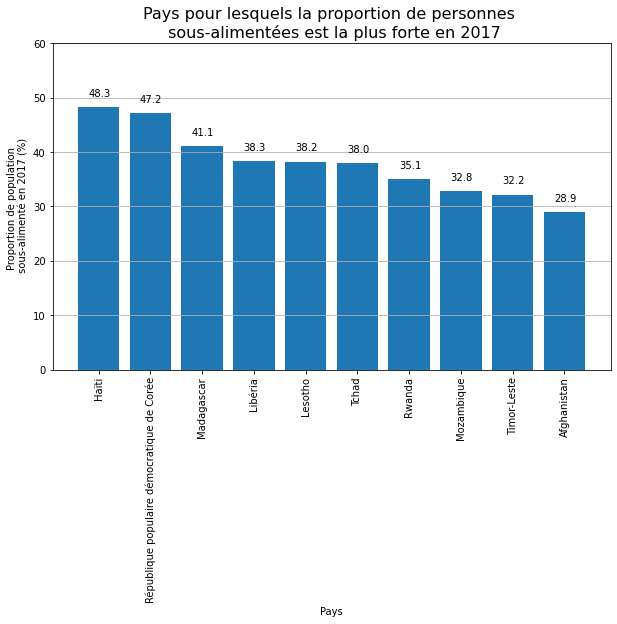

In [37]:
# Définition de la taille du graphique
plt.figure(figsize=(10,6))

# Définition des valeurs du graphique
plt.bar(df_sous_ali_top["Zone"], height=df_sous_ali_top["Ratio Sous-Alimentation (%)"])

# Rotation de la graduation en x à 90 degrés
plt.xticks(rotation = 90)

# Définition du titre du graphique
plt.title("Pays pour lesquels la proportion de personnes \n sous-alimentées est la plus forte en 2017", fontsize=16)

# Définition du nom des données en x
plt.xlabel("Pays")

# Définition du nom des données en y
plt.ylabel("Proportion de population \n sous-alimenté en 2017 (%)")

# Affichage d'une grille en y
plt.grid(axis="y")

# Définition de la limite des données en y
plt.ylim(0,60)

# Affichage des valeurs des données sur le graphique
taux = df_sous_ali_top["Ratio Sous-Alimentation (%)"].tolist()
for i in range(10):
    plt.text(i-0.2, taux[i]+2, round(taux[i],1))

# Affichage du graphique
plt.show()

## Pays ayant bénéficié le plus d’aide depuis 2013

In [15]:
df = df_aide_alimentaire

# Regroupement du tableau Aide Alimentaire par Pays Bénéficiaire en selectionnant la valeur. 
df = df.groupby("Pays bénéficiaire")["Valeur"].sum().reset_index()

# Classement des Valeeurs par ordre décroissant
df = df.sort_values("Valeur", ascending=False)

# Sauvegarde des 10 premières valeurs
df = df.head(10)

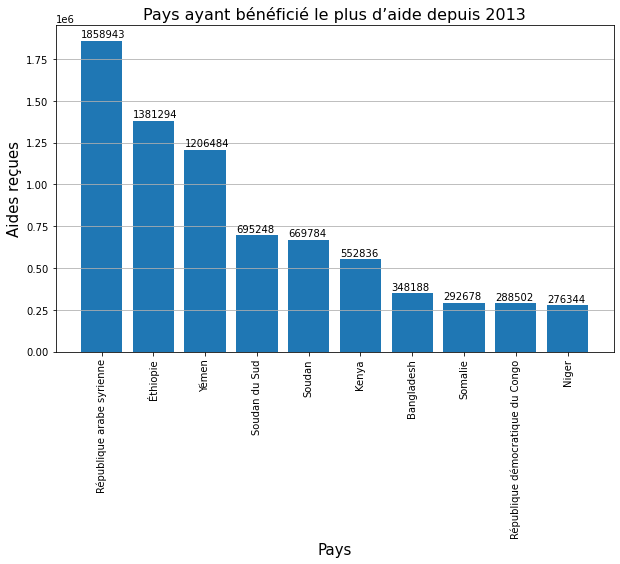

In [16]:
# Définition de la taille du graphique
plt.figure(figsize=(10,6))

# Définition du titre du graphique
plt.title("Pays ayant bénéficié le plus d’aide depuis 2013", fontsize=16)

# Définition des valeurs du graphique
plt.bar(df["Pays bénéficiaire"], df["Valeur"])

# Rotation de la graduation en x à 90 degrés
plt.xticks(rotation=90)

# Définition du nom des données en x
plt.xlabel("Pays", fontsize=15)

# Définition du nom des données en y
plt.ylabel("Aides reçues", fontsize=15)

# Affichage d'une grille en y
plt.grid(axis="y")

# Affichage des valeurs des données sur le graphique
valeur = df["Valeur"].tolist()
for i in range(10):
    plt.text(i-0.4, valeur[i]+20000, valeur[i])

# Affichage du graphique
plt.show()

## Pays ayant le plus de disponibilité par habitant (Disponibilité Alimentaire)

In [17]:
df = df_dispo_alimentaire

# Grouper par Zone et afficher la Dispo Alimentaire
df = df_dispo_alimentaire.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()

# Trier les valeurs par ordre décroissant -> Pour le plus de disponibilité Alimentaire
df = df.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)

# Trier les valeurs par ordre croissant -> Pour le moins de disponibilité Alimentaire
df1 = df.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=True)

# Enregistrer les 10 premiers résultats pour le plus de disponibilité Alimentaire
df = df.head(10)

# Enregistrer les 10 premiers résultats pour le moins de disponibilité Alimentaire
df1 = df1.head(10)

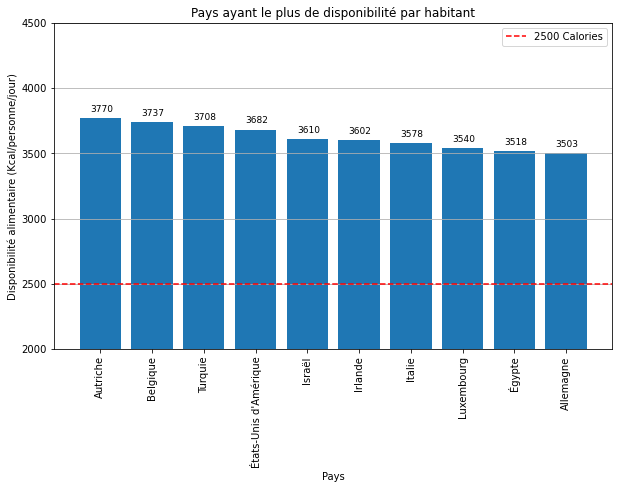

In [18]:
# Définition de la taille du graphique
plt.figure(figsize=(10,6))

# Définition du titre du graphique
plt.title("Pays ayant le plus de disponibilité par habitant")

# Définition des valeurs du graphique
plt.bar(df["Zone"], df["Disponibilité alimentaire (Kcal/personne/jour)"])

# Définition de la constante du seuille de calories sous-nutrition
plt.axhline(2500, color="r", linestyle="--", label="2500 Calories")

# Rotation de la graduation en x à 90 degrés
plt.xticks(rotation = 90)

# Définition de la limite des données en y
plt.ylim(2000, 4500)

# Définition du nom des données en x
plt.xlabel("Pays")

# Définition du nom des données en y 
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)")

# Affichage d'une grille en y
plt.grid(axis="y")

# Affichage de la légende
plt.legend()

# Affichage des valeurs des données sur le graphique
values = df["Disponibilité alimentaire (Kcal/personne/jour)"].tolist()
for i in range(10):
    plt.text(i-0.2, values[i]+50, int(values[i]), fontsize=9)

# Affichage du graphique
plt.show()

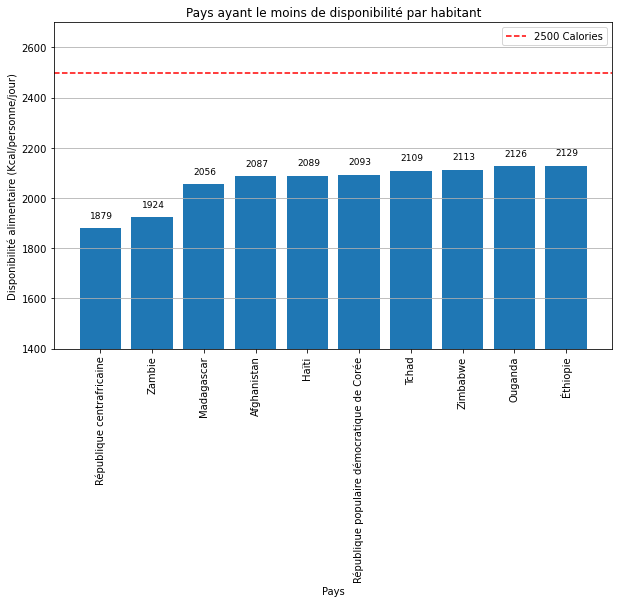

In [19]:
# Définition de la taille du graphique
plt.figure(figsize=(10,6))

# Définition du titre du graphique
plt.title("Pays ayant le moins de disponibilité par habitant")

# Définition des valeurs du graphique
plt.bar(df1["Zone"], df1["Disponibilité alimentaire (Kcal/personne/jour)"])

# Définition de la constante du seuille de calories sous-nutrition
plt.axhline(2500, color="r", linestyle="--", label="2500 Calories")

# Rotation de la graduation en x à 90 degrés
plt.xticks(rotation = 90)

# Définition de la limite des données en y
plt.ylim(1400, 2700)

# Définition du nom des données en x
plt.xlabel("Pays")

# Définition du nom des données en y 
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)")

# Affichage d'une grille en y
plt.grid(axis="y")

# Affichage de la légende
plt.legend()

# Affichage des valeurs des données sur le graphique
values = df1["Disponibilité alimentaire (Kcal/personne/jour)"].tolist()
for i in range(10):
    plt.text(i-0.2, values[i]+40, int(values[i]), fontsize=9)

# Affichage du graphique
plt.show()

## Autres Informations

### ●	Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le lien juste ci-dessus.

In [20]:
df_dispo_cereales = pd.read_csv("Données/Donnée Alimentaire Céréales 2017.csv").fillna(0)

In [21]:
df_dispo_cereales = df_dispo_cereales.pivot_table(values="Valeur", index="Zone", columns="Élément").reset_index()
df_dispo_cereales = df_dispo_cereales[["Zone", "Aliments pour animaux", "Nourriture", "Disponibilité alimentaire (Kcal/personne/jour)", "Disponibilité intérieure", "Exportations - Quantité", "Importations - Quantité", "Pertes", "Production"]]

In [22]:
aliment_animaux_mean = df_dispo_cereales["Aliments pour animaux"].mean()
nourriture_mean = df_dispo_cereales["Nourriture"].mean()

In [23]:
valeur = [aliment_animaux_mean, nourriture_mean]
labels = ["Aliments pour animaux", "Nourriture"]

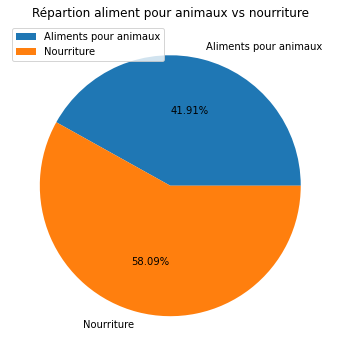

In [24]:
plt.figure(figsize=(10,6))
plt.pie(x = valeur, labels = labels, autopct='%.2f%%')
plt.title("Répartion aliment pour animaux vs nourriture")
plt.legend(loc = 2)
plt.show()

### ●	Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. Il serait intéressant d’aller à nouveau y jeter un coup d’œil, de mémoire ça concernait l’exportation par rapport à la production.

In [25]:
#Filtre pour obtenir la ligne sur le Mainioc de la Thaïlande
df = df_dispo_alimentaire.loc[(df_dispo_alimentaire["Produit"] == "Manioc") & (df_dispo_alimentaire["Zone"] == "Thaïlande")]

#Reset de l'index
df = df.reset_index()

#Définition de la proportion d'export du mainioc
proportion_manioc_thailande = round((df["Exportations - Quantité"][0] / df["Production"][0])*100,2)

print("La Thaïlande exporte",proportion_manioc_thailande,"% de sa production de Manioc")

La Thaïlande exporte 83.41 % de sa production de Manioc


In [26]:
#Filtre pour obtenir le ratio de sous_alientation de la Thaïlande
df_sous_ali = df_sous_ali.loc[df_sous_ali["Zone"] == "Thaïlande"].reset_index()

#Arrondi du ratio
ratio_sous_ali_thailande = round(df_sous_ali["Ratio Sous-Alimentation (%)"][0],2)

print("La proportion de personne en état de sous-nutrition en Thaïlande est de",ratio_sous_ali_thailande,"%")

La proportion de personne en état de sous-nutrition en Thaïlande est de 8.96 %
